(150, 4)
Matriz de covariância K:
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]



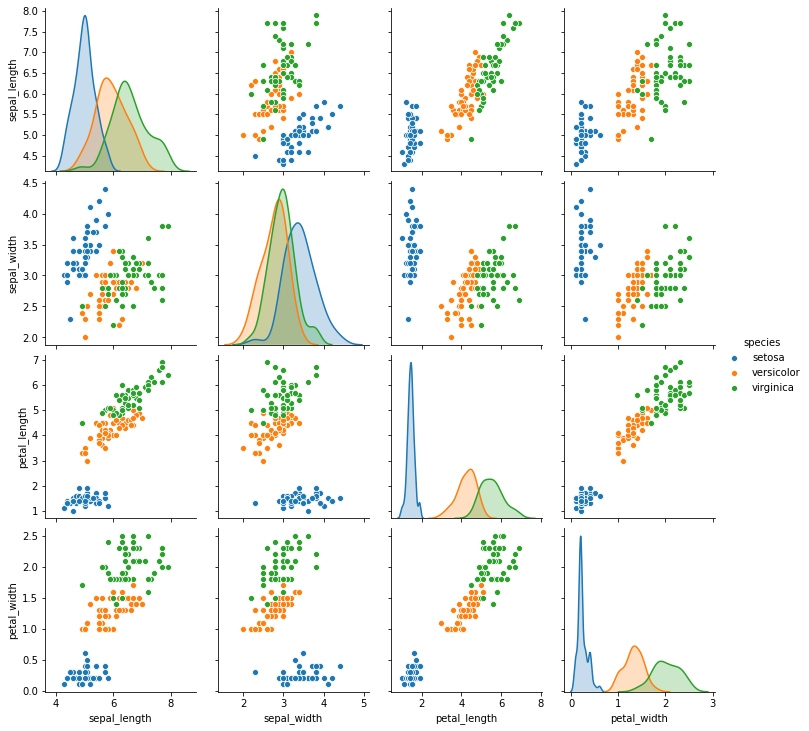

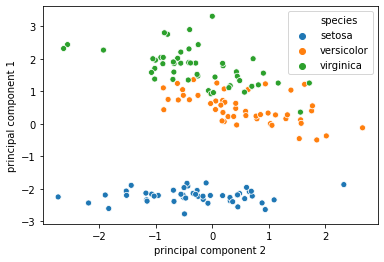

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

iris= pd.read_csv('../iris.cvs')
sb.pairplot(iris, hue = 'species') 
# print(iris_data)

#copy data with no labels
iris_data = iris.drop(['species'], axis=1, inplace = False)
# print(iris_data)

data = iris_data.values
print(data.shape)
#Normalização dos dados
x = StandardScaler().fit_transform(data)

K = np.cov(x.T)
print("Matriz de covariância K:\n %s\n"%K)
eigenvalues, eigenvectors = np.linalg.eig(K)

#sorting the values decreasing order
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# Changing to the new base
principal_comp = []
for eigenvectorT in (eigenvectors.T):
    principal_comp.append(x.dot(eigenvectorT))
    
principal_comp = np.array(principal_comp)
# print(principal_comp.shape)
# Data = pd.DataFrame(data = principal_comp.T, columns=['principal component 1', 'principal component 2', 'principal component 3','principal component 4'])
# Data = pd.concat([Data, iris['species']], axis = 1)

# sb.pairplot(Data, hue = 'species')

plt.show()
Data_2D = pd.DataFrame(data = principal_comp[:2].T, columns=['principal component 1', 'principal component 2'])
Data_2D = pd.concat([Data_2D, iris['species']], axis = 1)
# sb.pairplot(Data_2D, hue = 'species')
sb.scatterplot(Data_2D['principal component 2'],Data_2D['principal component 1'], hue = Data_2D['species'])
plt.show()

In [121]:
#matriz de adjacencia W
def Adj_matrix(data):
    n = len(data[0])
    W = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            # a distancia de um nó com ele mesmo é zero, portanto:
            if i!=j:
                d = np.sum([(data[row][i]-data[row][j])**2 for row in range(len(data))])
                d = 1/(np.sqrt(d)+0.0001) # para evitar divisões por zero
                W[i,j] = d
    return W
# Matriz de grau D
def Degree_matrix(W):
    D = np.zeros(W.shape)
    for i in range(len(W)):
        D[i,i] = np.sum(W[i,:])
    return D


data_PCA = np.array(principal_comp[:2])

W = Adj_matrix(data_PCA) 
D = Degree_matrix(W)      

# Calculando a matriz laplaciana
L = D-W

# print(W)
# print(D)
# print(L)

# Calculando os autovalores e autovetores:
e, v = np.linalg.eig(L)

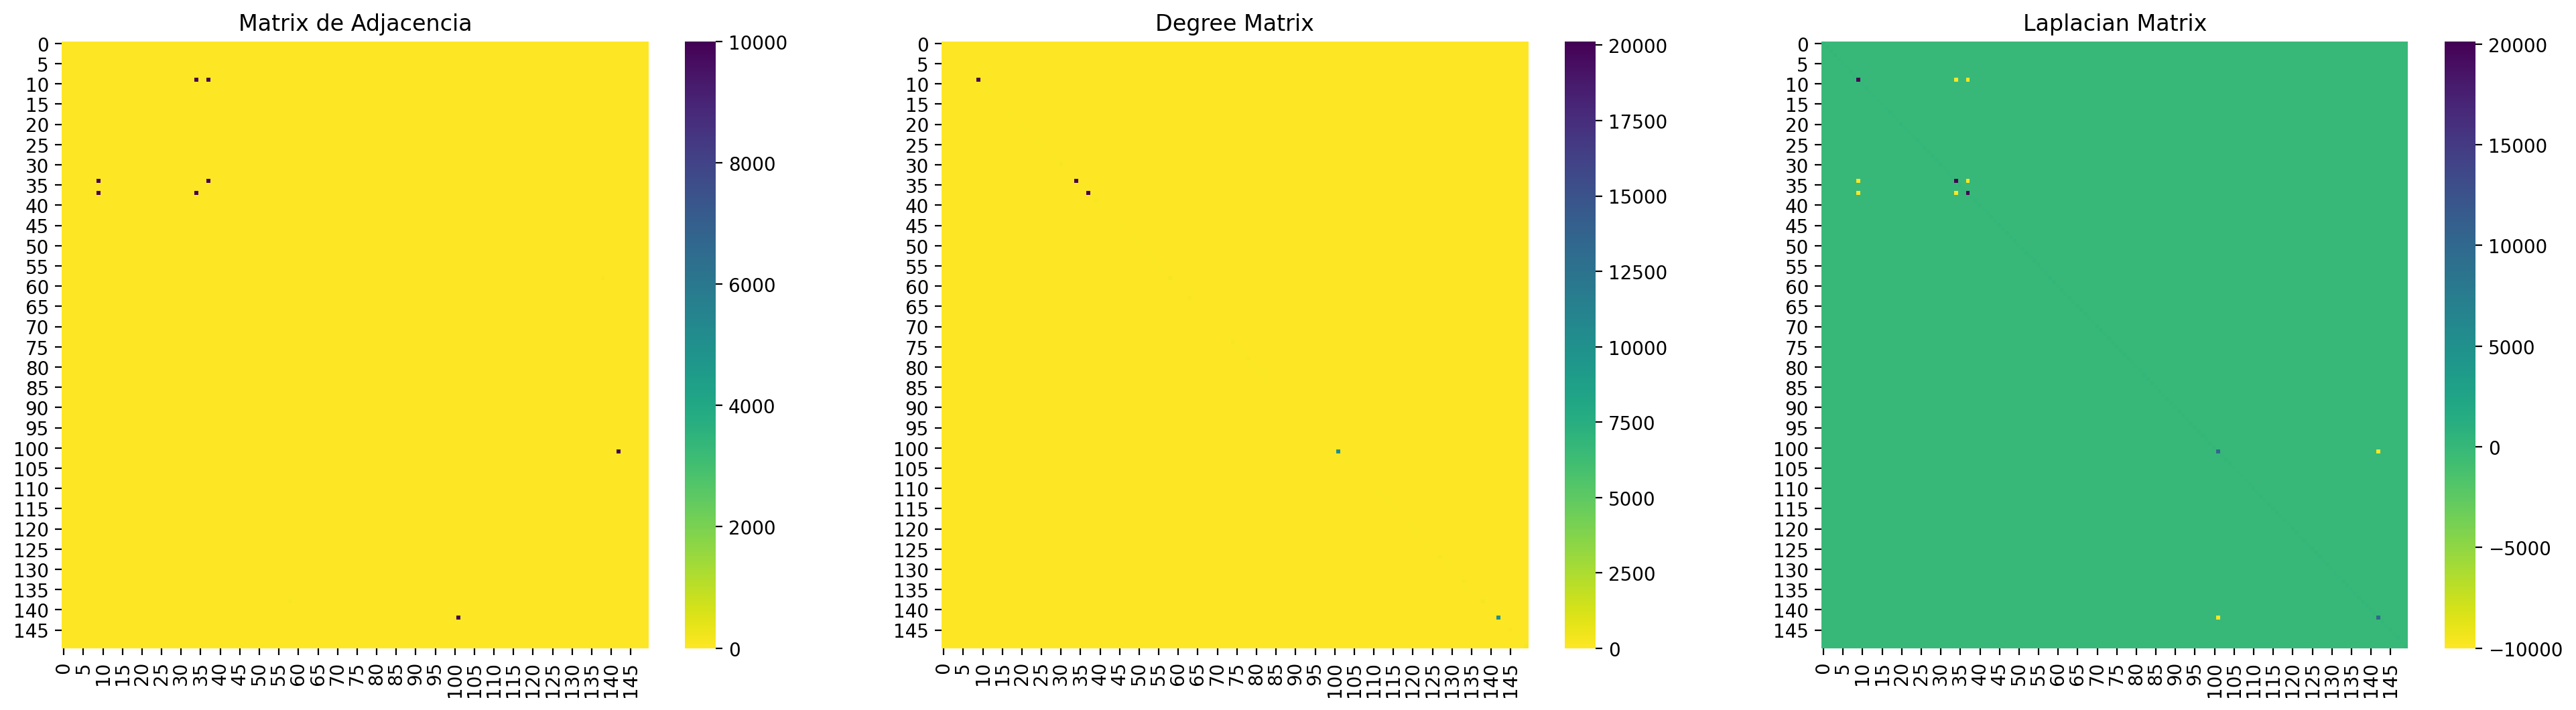

In [120]:
#visualizando as matrizes
fig, ax = plt.subplots(1,3, figsize=(8*3, 6), dpi=200)
sb.heatmap(W, ax=ax[0], cmap='viridis_r')
ax[0].set(title='Matrix de Adjacencia')

sb.heatmap(D, ax=ax[1], cmap='viridis_r')
ax[1].set(title='Degree Matrix')

sb.heatmap(L, ax=ax[2], cmap='viridis_r')
ax[2].set(title='Laplacian Matrix')
plt.show()

# Lets define some classes


In [28]:
#matriz de adjacencia W
def Adj_matrix(data):
    n = len(data[0])
    W = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            # a distancia de um nó com ele mesmo é zero, portanto:
            if i!=j:
                d = np.sum([(data[row][i]-data[row][j])**2 for row in range(len(data))])
                d = 1/(np.sqrt(d)+0.0001) # para evitar divisões por zero
                W[i,j] = d
    return W
# Matriz de grau D
def Degree_matrix(W):
    D = np.zeros(W.shape)
    for i in range(len(W)):
        D[i,i] = np.sum(W[i,:])
    return D


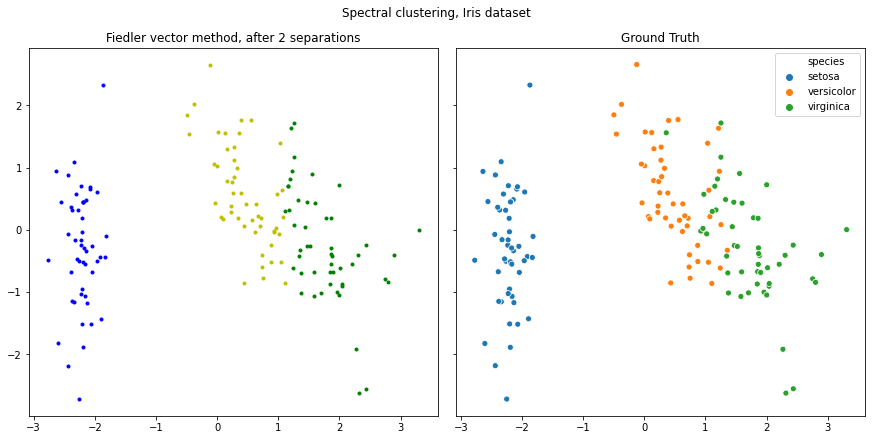

In [38]:

def Spectral(data):
    W = Adj_matrix(data) 
    D = Degree_matrix(W)      
    # Calculando a matriz laplaciana
    L = D-W
    # Calculando os autovalores e autovetores:
    e, v = np.linalg.eig(L)
    
    eigen= pd.DataFrame(data=v,columns=e)
    eigen= eigen.reindex(sorted(eigen.columns), axis=1)
    Fiedler= pd.DataFrame(data=[eigen[eigen.columns[1] ].values],columns=range( len(eigen[eigen.columns[1] ].values) ),index=[0])
    Fiedler= Fiedler.sort_values(by=0, axis=1)
    return Fiedler

F1 = Spectral(principal_comp[:2])
F2 = Spectral(np.array([principal_comp[0][50:], principal_comp[0][50:]]))

fig, ax = plt.subplots(1, 2,figsize=(6*2,6), sharex=True, sharey=True,constrained_layout=True)
fig.suptitle("Spectral clustering, Iris dataset")

x, y = principal_comp[0], principal_comp[1]
ax[0].plot([x[i] for i in F1.columns[0:50]] ,[y[i] for i in F1.columns[0:50]],'b.')0
ax[0].plot([x[50+i] for i in F2.columns[0:50]] ,[y[50+i] for i in F2.columns[0:50]],'g.')1
ax[0].plot([x[50+i] for i in F2.columns[50:]] ,[y[50+i] for i in F2.columns[50:]],'y.')2



ax[0].set_title("Fiedler vector method, after 2 separations")
ax[1].set_title("Ground Truth")
sb.scatterplot(x,y, ax = ax[1], hue = Data_2D['species'])
plt.show()

In [42]:
#matrix de confusão

labels = np.zeros(150, dtype= 'int64')
for i in F1.columns[0:50]:
    labels[i] = 0
for i in F2.columns[0:50]:
    labels[i+50] = 1
for i in F2.columns[50:]:
    labels[50+i] = 2
    
y_true = np.copy(Data_2D['species'])
y_true[y_true=='versicolor']= 2
y_true[y_true=='setosa']= 0
y_true[y_true=='virginica']= 1
#Type match
y_true = np.array(y_true, dtype='int64')

print("Matrix de confusão")
y_pred = labels
print(confusion_matrix(y_true, y_pred))
print("\n\n")


Matrix de confusão
[[50  0  0]
 [ 0 45  5]
 [ 0  5 45]]



